# show reconstruct image

In [1]:
import pickle
import yaml
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

In [2]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [3]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
PKL_DIR = OUTPUT_ROOT +'/pkl'
os.makedirs(MODEL_DIR, exist_ok=True)

In [4]:
with open('{}/{}_history.pkl'.format(PKL_DIR, 'valve'), 'rb') as file:
    history = pickle.load(file)

In [5]:
history['reconstruct_img']['input'][0].shape

torch.Size([3, 64, 128])

In [6]:
epoch_num = 6 # * 10

In [7]:
input_img = history['reconstruct_img']['input'][epoch_num][0,:,:].to('cpu')
output_img = history['reconstruct_img']['output'][epoch_num][0,:,:].to('cpu')

In [8]:
input_img.shape

torch.Size([64, 128])

In [9]:
np.array(F.mse_loss(output_img, input_img))

array(9.730258, dtype=float32)

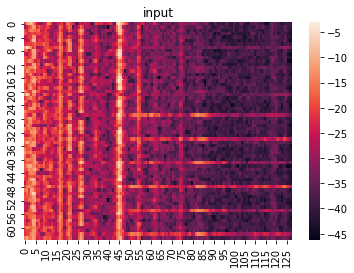

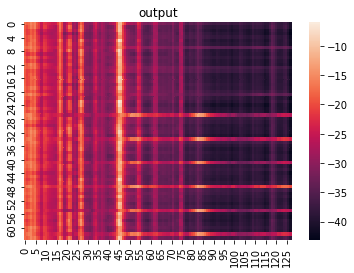

In [10]:
sns.heatmap(input_img)
plt.title('input')
plt.show()
sns.heatmap(output_img)
plt.title('output')
plt.show()

# eval

## import library

In [11]:
########################################################################
# import default python-library
########################################################################
import os
import glob
import csv
import re
import itertools
import sys
from collections import defaultdict
########################################################################


########################################################################
# import additional python-library
########################################################################
import numpy
from sklearn import metrics
import common as com
import pytorch_modeler as modeler
from pytorch_model import LSTM_AutoEncoder as Model
import torch.utils.data
import yaml
yaml.warnings({'YAMLLoadWarning': False})
import matplotlib.pyplot as plt
import seaborn as sns
########################################################################
import eval_functions as eval_func

## Setting

In [12]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
########################################################################
# Setting seed
########################################################################
modeler.set_seed(42)

In [14]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
os.makedirs(MODEL_DIR, exist_ok=True)

In [15]:
########################################################################
# for original function
########################################################################
param = {}
param["dev_directory"] = dev_path
param["eval_directory"] = eval_path
param["model_directory"] = MODEL_DIR
param["result_directory"] = RESULT_DIR
param["result_file"] = 'result.csv'

## run eval

In [16]:
def make_reconstruct_img(x, y, label, file_name):
    fig = plt.figure(figsize=(10,5)) # width, height
    fig.suptitle('label={}'.format(int(label)))
    ax1 = fig.add_subplot(121, title='x') # 明示的にAxesを作成する
    sns.heatmap(x.T, ax=ax1) # ax1を参照するようにする
    ax2 = fig.add_subplot(122, title='y')
    sns.heatmap(y.T, ax=ax2)
    fig.savefig('{}.png'.format(file_name))

In [17]:
mode = 'dev'

2020-11-08 11:20:30,653 - INFO - load_directory <- development
2020-11-08 11:20:30,654 - INFO - ===========================
2020-11-08 11:20:30,655 - INFO - [1/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar
2020-11-08 11:20:30,655 - INFO - ============== MODEL LOAD ==============
2020-11-08 11:20:31,239 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_01
2020-11-08 11:20:31,247 - INFO - test_file  num : 601
2020-11-08 11:20:31,248 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:20:37,901 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_ToyCar_id_01.csv
2020-11-08 11:20:37,904 - INFO - AUC : 0.780352874217416
2020-11-08 11:20:37,905 - INFO - pAUC : 0.6213042566575802
2020-11-08 11:20:37,906 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:20:37,906 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_02
2020-11-08 11:20:37,915 - INFO - test_file  num : 602
2020-11-08 11:20:37,916 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:20:45,184 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_ToyCar_id_02.csv
2020-11-08 11:20:45,187 - INFO - AUC : 0.8169160997732426
2020-11-08 11:20:45,188 - INFO - pAUC : 0.6580737558181167
2020-11-08 11:20:45,189 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:20:45,189 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_03
2020-11-08 11:20:45,198 - INFO - test_file  num : 602
2020-11-08 11:20:45,199 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:20:53,138 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_ToyCar_id_03.csv
2020-11-08 11:20:53,141 - INFO - AUC : 0.6160090702947847
2020-11-08 11:20:53,142 - INFO - pAUC : 0.5394438477145244
2020-11-08 11:20:53,143 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:20:53,143 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_04
2020-11-08 11:20:53,155 - INFO - test_file  num : 602
2020-11-08 11:20:53,155 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:21:01,650 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_ToyCar_id_04.csv
2020-11-08 11:21:01,654 - INFO - AUC : 0.8958616780045352
2020-11-08 11:21:01,655 - INFO - pAUC : 0.7567132116004296
2020-11-08 11:21:01,655 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:21:01,656 - INFO - ===========================
2020-11-08 11:21:01,656 - INFO - [2/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor
2020-11-08 11:21:01,657 - INFO - ============== MODEL LOAD ==============
2020-11-08 11:21:02,085 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_01
2020-11-08 11:21:02,106 - INFO - test_file  num : 1181
2020-11-08 11:21:02,109 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:21:16,506 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_ToyConveyor_id_01.csv
2020-11-08 11:21:16,510 - INFO - AUC : 0.6764796587926509
2020-11-08 11:21:16,511 - INFO - pAUC : 0.540302527973477
2020-11-08 11:21:16,512 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:21:16,513 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_02
2020-11-08 11:21:16,530 - INFO - test_file  num : 1136
2020-11-08 11:21:16,531 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure

2020-11-08 11:21:29,954 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_ToyConveyor_id_02.csv
2020-11-08 11:21:29,959 - INFO - AUC : 0.6114136904761903
2020-11-08 11:21:29,960 - INFO - pAUC : 0.5226934523809524
2020-11-08 11:21:29,961 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:21:29,962 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_03
2020-11-08 11:21:29,975 - INFO - test_file  num : 1135
2020-11-08 11:21:29,976 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:21:43,003 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_ToyConveyor_id_03.csv
2020-11-08 11:21:43,008 - INFO - AUC : 0.6762172954288099
2020-11-08 11:21:43,008 - INFO - pAUC : 0.5409322743655133
2020-11-08 11:21:43,009 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:21:43,009 - INFO - ===========================
2020-11-08 11:21:43,010 - INFO - [3/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan
2020-11-08 11:21:43,011 - INFO - ============== MODEL LOAD ==============
2020-11-08 11:21:43,346 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_00
2020-11-08 11:21:43,357 - INFO - test_file  num : 489
2020-11-08 11:21:43,360 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:21:49,851 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_fan_id_00.csv
2020-11-08 11:21:49,855 - INFO - AUC : 0.523624678663239
2020-11-08 11:21:49,856 - INFO - pAUC : 0.4979028548234339
2020-11-08 11:21:49,859 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:21:49,860 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_02
2020-11-08 11:21:49,869 - INFO - test_file  num : 441
2020-11-08 11:21:49,870 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:21:56,701 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_fan_id_02.csv
2020-11-08 11:21:56,704 - INFO - AUC : 0.5504985337243402
2020-11-08 11:21:56,705 - INFO - pAUC : 0.5017749652724186
2020-11-08 11:21:56,705 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:21:56,706 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_04
2020-11-08 11:21:56,713 - INFO - test_file  num : 430
2020-11-08 11:21:56,714 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:03,780 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_fan_id_04.csv
2020-11-08 11:22:03,783 - INFO - AUC : 0.5064242424242424
2020-11-08 11:22:03,784 - INFO - pAUC : 0.5185007974481659
2020-11-08 11:22:03,784 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:03,785 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_06
2020-11-08 11:22:03,795 - INFO - test_file  num : 443
2020-11-08 11:22:03,796 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:10,549 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_fan_id_06.csv
2020-11-08 11:22:10,553 - INFO - AUC : 0.6346064139941692
2020-11-08 11:22:10,553 - INFO - pAUC : 0.5511738529998466
2020-11-08 11:22:10,554 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:10,557 - INFO - ===========================
2020-11-08 11:22:10,559 - INFO - [4/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump
2020-11-08 11:22:10,561 - INFO - ============== MODEL LOAD ==============
2020-11-08 11:22:11,034 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_00
2020-11-08 11:22:11,041 - INFO - test_file  num : 237
2020-11-08 11:22:11,044 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:15,641 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_pump_id_00.csv
2020-11-08 11:22:15,645 - INFO - AUC : 0.6888321167883211
2020-11-08 11:22:15,646 - INFO - pAUC : 0.5516711486746062
2020-11-08 11:22:15,646 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:15,647 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_02
2020-11-08 11:22:15,651 - INFO - test_file  num : 205
2020-11-08 11:22:15,652 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:19,678 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_pump_id_02.csv
2020-11-08 11:22:19,682 - INFO - AUC : 0.7083809523809523
2020-11-08 11:22:19,683 - INFO - pAUC : 0.5974937343358396
2020-11-08 11:22:19,684 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:19,684 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_04
2020-11-08 11:22:19,688 - INFO - test_file  num : 194
2020-11-08 11:22:19,691 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:23,374 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_pump_id_04.csv
2020-11-08 11:22:23,378 - INFO - AUC : 0.797872340425532
2020-11-08 11:22:23,379 - INFO - pAUC : 0.6321388577827548
2020-11-08 11:22:23,379 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:23,380 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_06
2020-11-08 11:22:23,384 - INFO - test_file  num : 196
2020-11-08 11:22:23,385 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:27,575 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_pump_id_06.csv
2020-11-08 11:22:27,578 - INFO - AUC : 0.5860416666666667
2020-11-08 11:22:27,579 - INFO - pAUC : 0.5471491228070176
2020-11-08 11:22:27,580 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:27,581 - INFO - ===========================
2020-11-08 11:22:27,582 - INFO - [5/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider
2020-11-08 11:22:27,582 - INFO - ============== MODEL LOAD ==============
2020-11-08 11:22:27,914 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_00
2020-11-08 11:22:27,922 - INFO - test_file  num : 445
2020-11-08 11:22:27,924 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:33,997 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_slider_id_00.csv
2020-11-08 11:22:34,001 - INFO - AUC : 0.867072463768116
2020-11-08 11:22:34,002 - INFO - pAUC : 0.6292906178489702
2020-11-08 11:22:34,003 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:34,003 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_02
2020-11-08 11:22:34,009 - INFO - test_file  num : 356
2020-11-08 11:22:34,010 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:38,917 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_slider_id_02.csv
2020-11-08 11:22:38,921 - INFO - AUC : 0.6581640625
2020-11-08 11:22:38,923 - INFO - pAUC : 0.5606496710526316
2020-11-08 11:22:38,924 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:38,924 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_04
2020-11-08 11:22:38,931 - INFO - test_file  num : 267
2020-11-08 11:22:38,932 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:43,904 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_slider_id_04.csv
2020-11-08 11:22:43,907 - INFO - AUC : 0.6891616766467066
2020-11-08 11:22:43,908 - INFO - pAUC : 0.5723290261582099
2020-11-08 11:22:43,909 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:43,910 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_06
2020-11-08 11:22:43,914 - INFO - test_file  num : 178
2020-11-08 11:22:43,915 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:47,547 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_slider_id_06.csv
2020-11-08 11:22:47,550 - INFO - AUC : 0.5338461538461539
2020-11-08 11:22:47,551 - INFO - pAUC : 0.48515519568151144
2020-11-08 11:22:47,552 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:47,552 - INFO - ===========================
2020-11-08 11:22:47,553 - INFO - [6/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve
2020-11-08 11:22:47,554 - INFO - ============== MODEL LOAD ==============
2020-11-08 11:22:47,932 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_00
2020-11-08 11:22:47,939 - INFO - test_file  num : 213
2020-11-08 11:22:47,940 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:51,904 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_valve_id_00.csv
2020-11-08 11:22:51,909 - INFO - AUC : 0.5373451327433628
2020-11-08 11:22:51,911 - INFO - pAUC : 0.5062878435025617
2020-11-08 11:22:51,912 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:51,914 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_02
2020-11-08 11:22:51,920 - INFO - test_file  num : 214
2020-11-08 11:22:51,921 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:55,917 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_valve_id_02.csv
2020-11-08 11:22:55,920 - INFO - AUC : 0.5800877192982457
2020-11-08 11:22:55,921 - INFO - pAUC : 0.5083102493074793
2020-11-08 11:22:55,922 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:55,922 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_04
2020-11-08 11:22:55,927 - INFO - test_file  num : 214
2020-11-08 11:22:55,928 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:22:59,674 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_valve_id_04.csv
2020-11-08 11:22:59,679 - INFO - AUC : 0.5971052631578947
2020-11-08 11:22:59,680 - INFO - pAUC : 0.5138504155124654
2020-11-08 11:22:59,681 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:22:59,684 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_06
2020-11-08 11:22:59,688 - INFO - test_file  num : 214
2020-11-08 11:22:59,690 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-08 11:23:03,530 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/anomaly_score_valve_id_06.csv
2020-11-08 11:23:03,534 - INFO - AUC : 0.4569736842105263
2020-11-08 11:23:03,534 - INFO - pAUC : 0.48614958448753465
2020-11-08 11:23:03,535 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-08 11:23:03,536 - INFO - AUC and pAUC results -> /media/hiroki/working/research/dcase2020/result/2D/LSTM_AEs/bidirectional_LSTM_AE_window_shift/result/result.csv


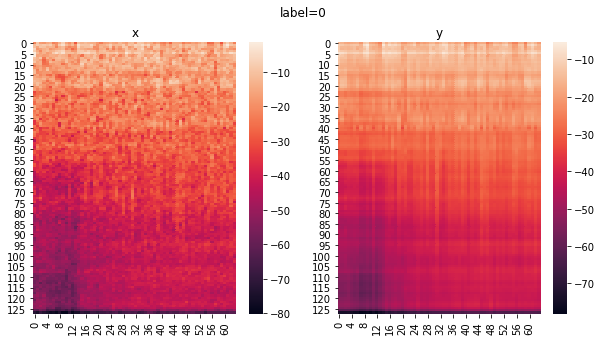

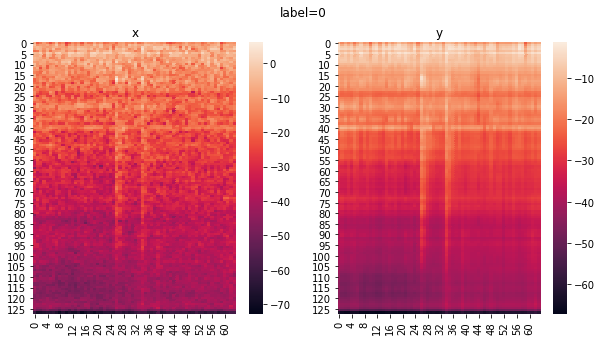

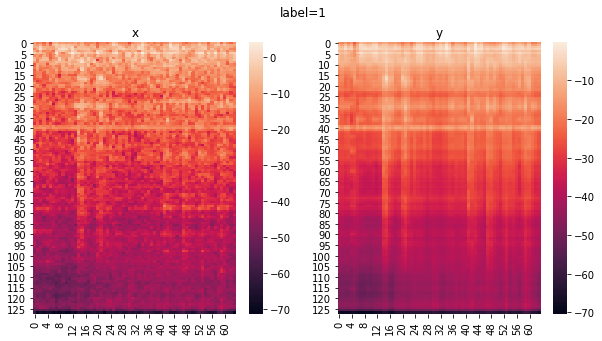

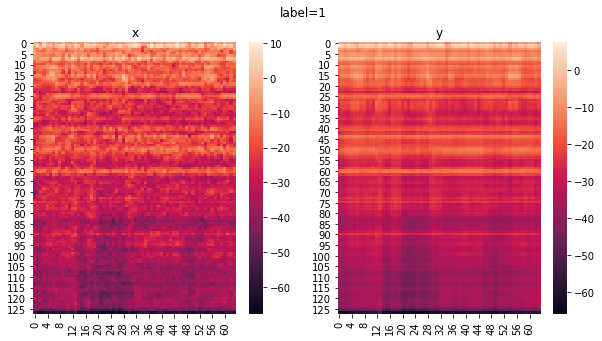

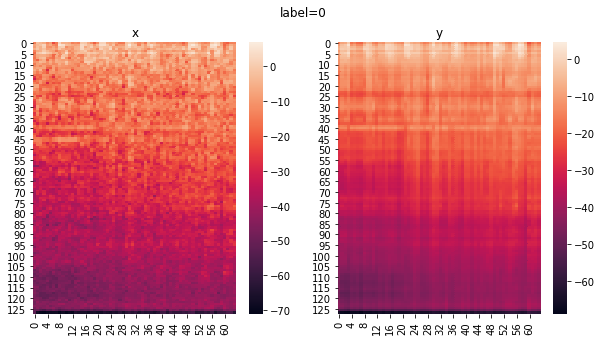

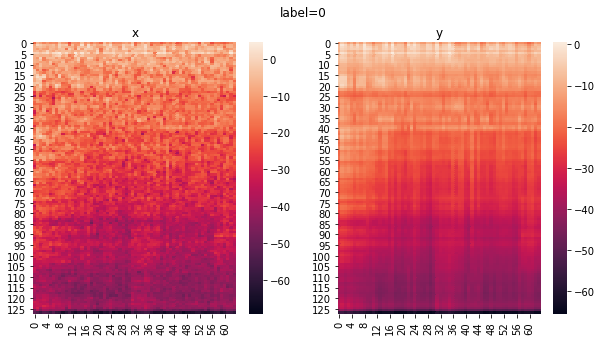

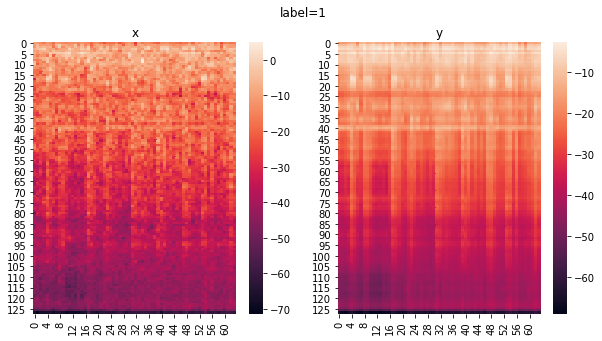

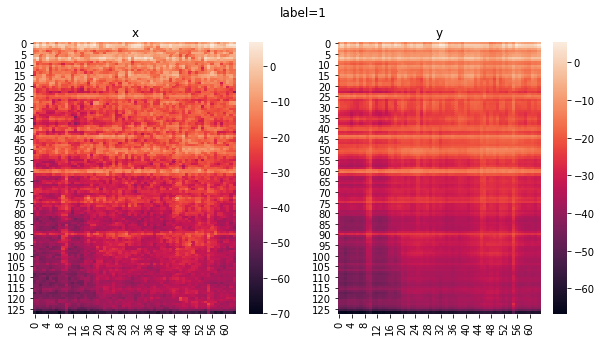

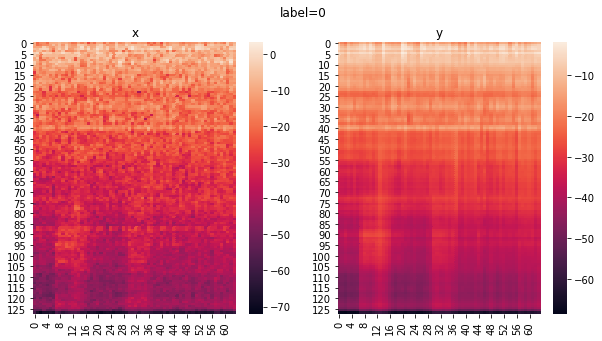

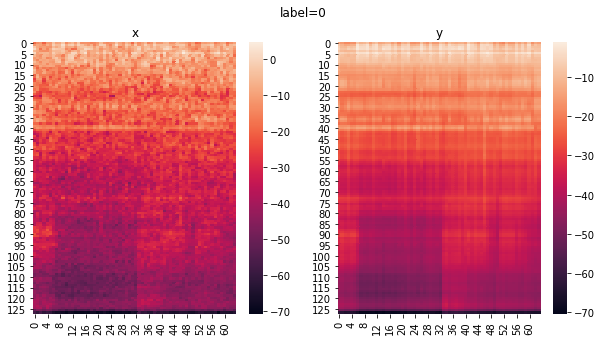

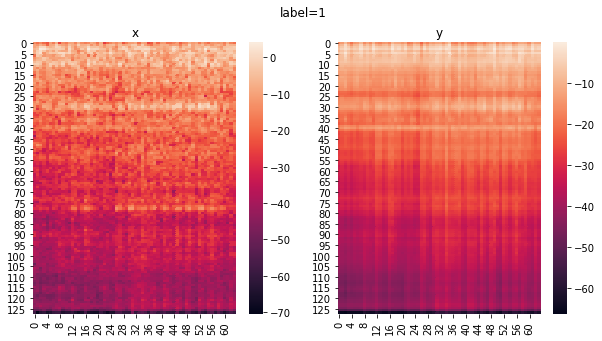

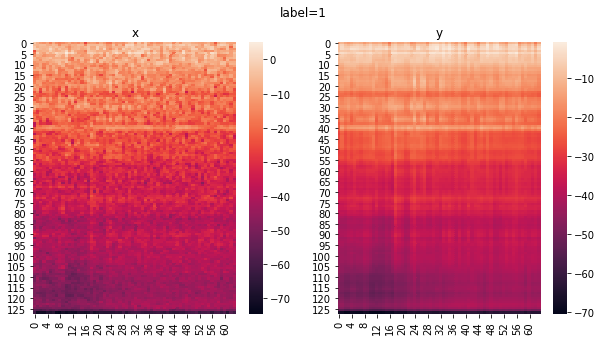

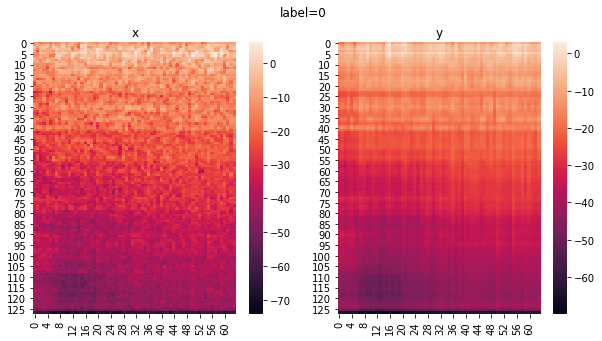

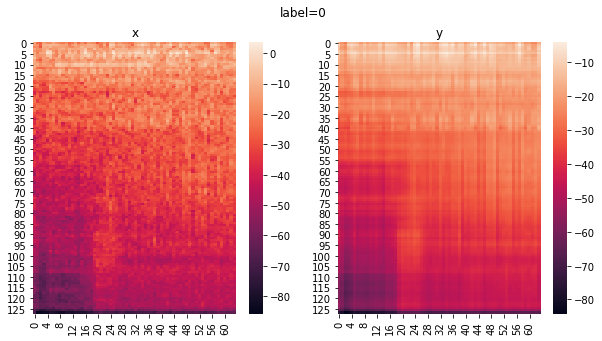

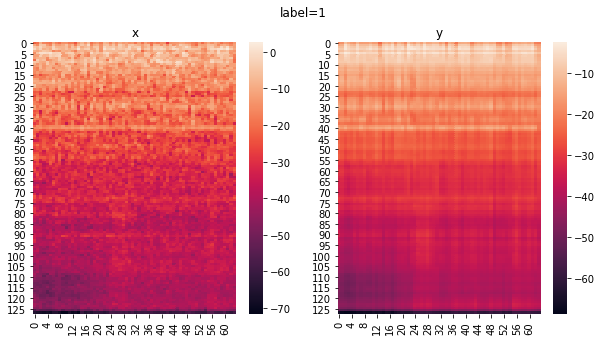

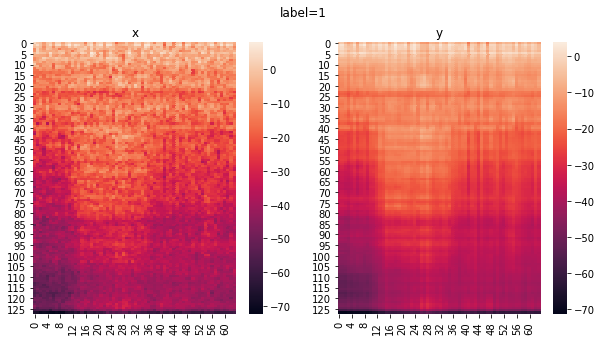

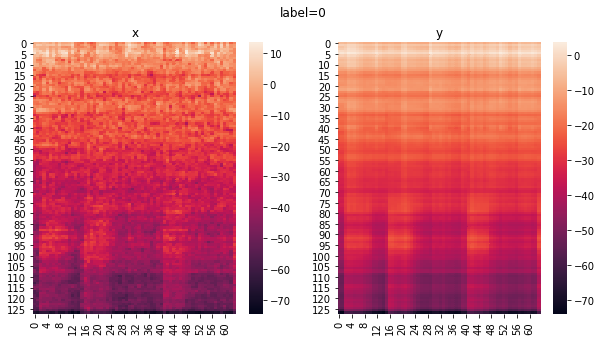

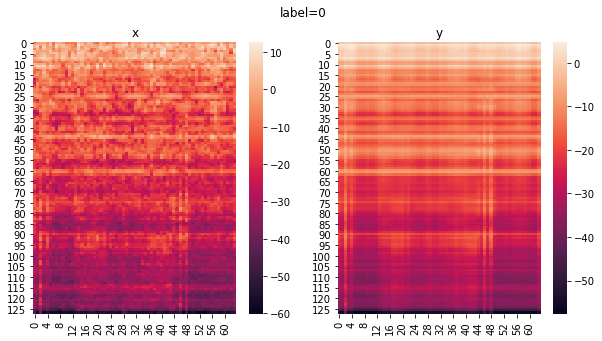

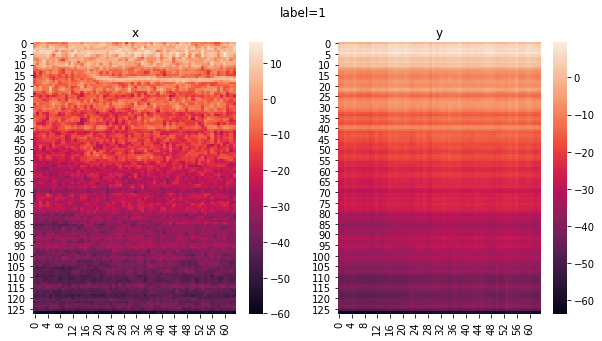

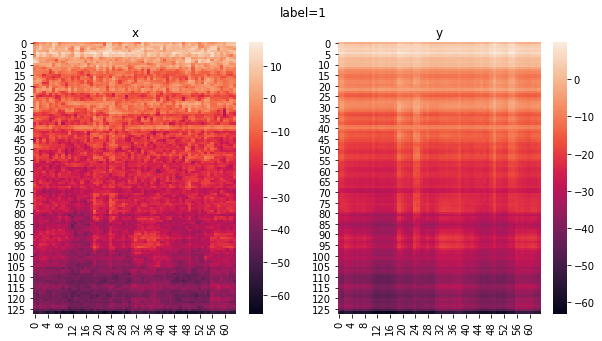

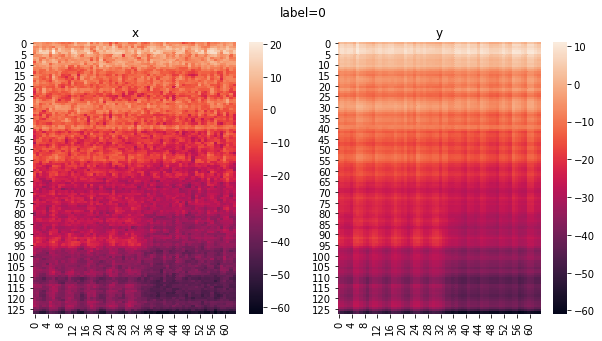

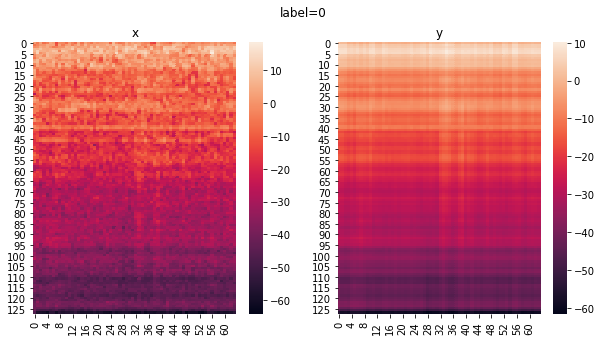

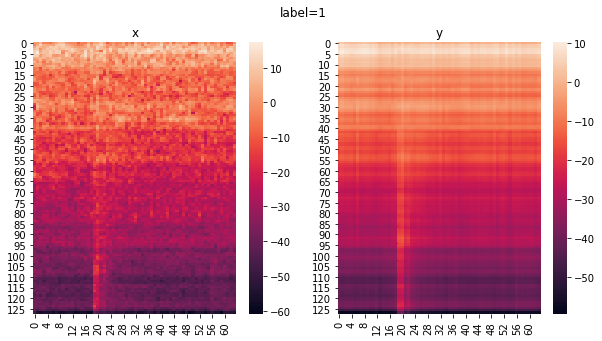

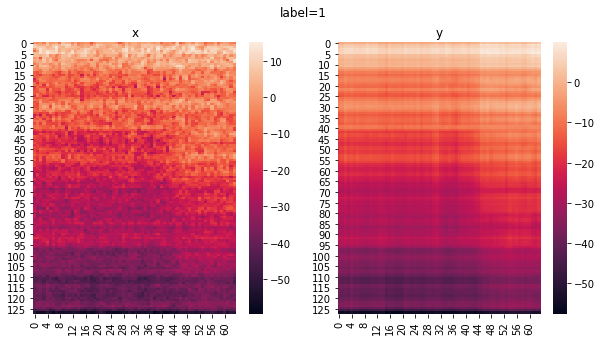

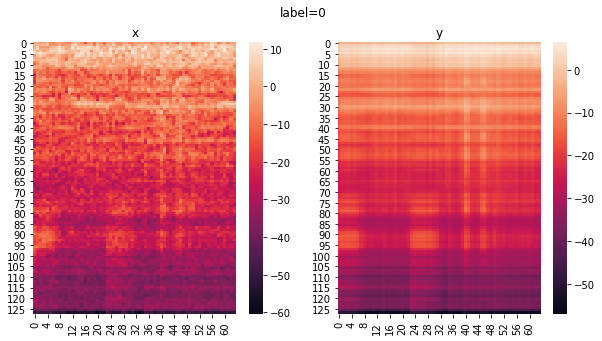

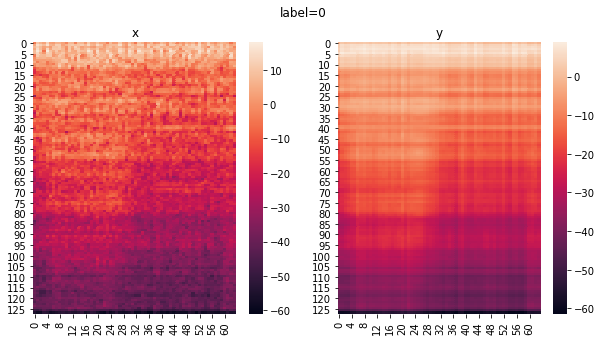

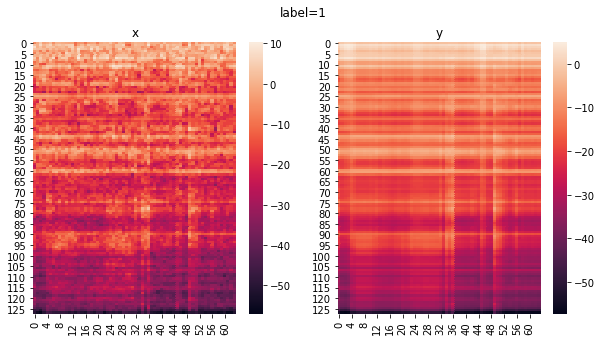

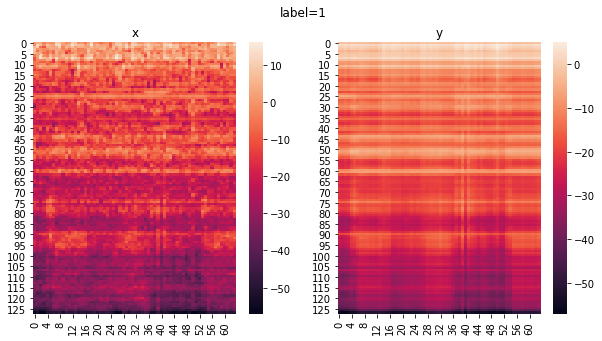

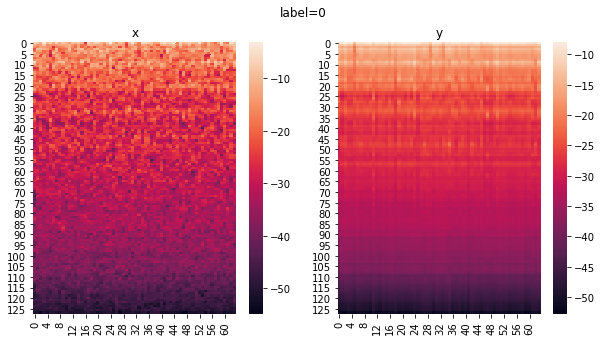

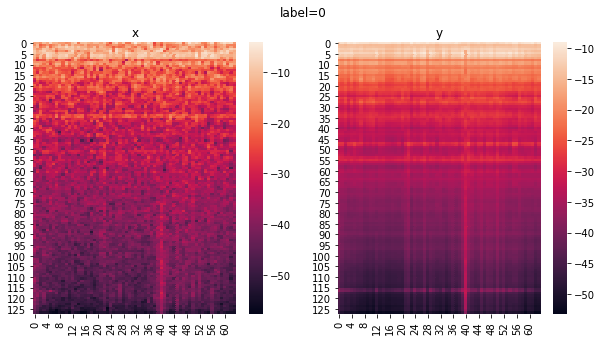

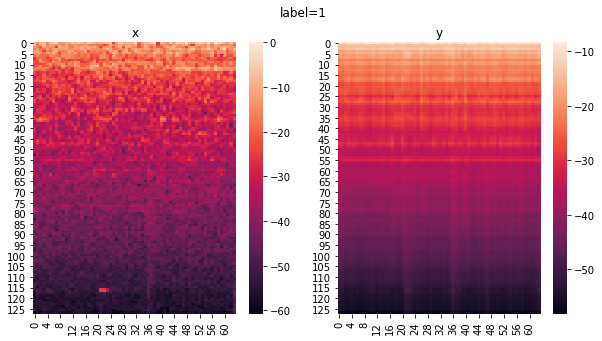

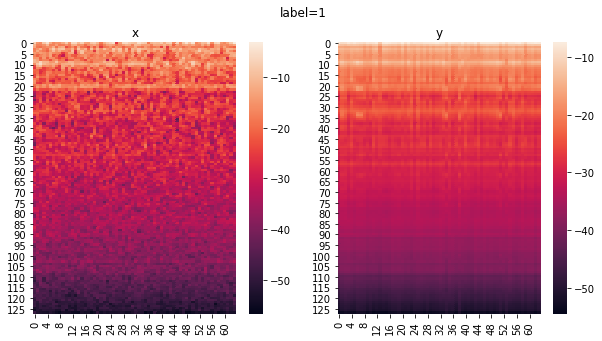

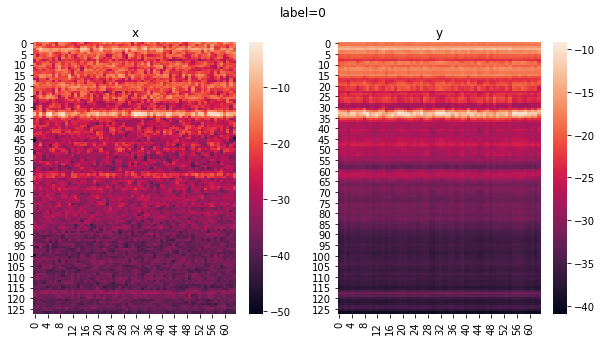

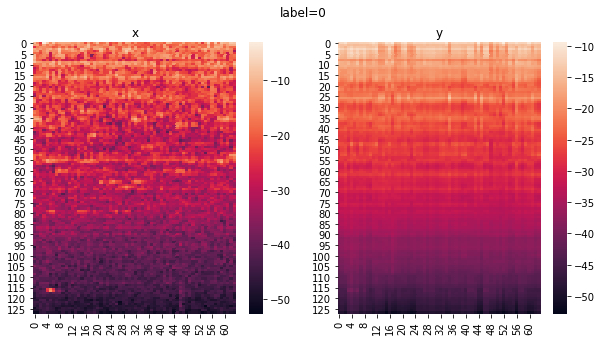

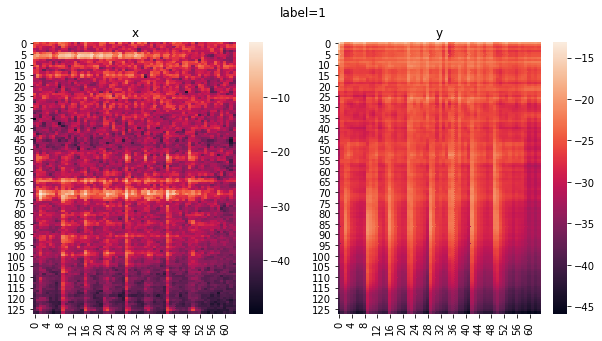

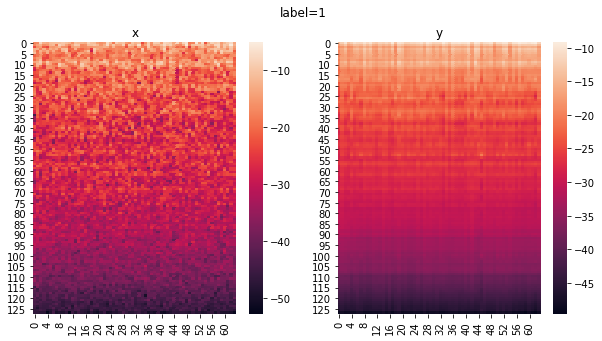

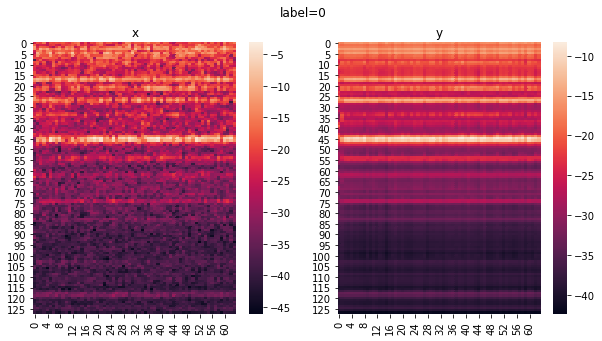

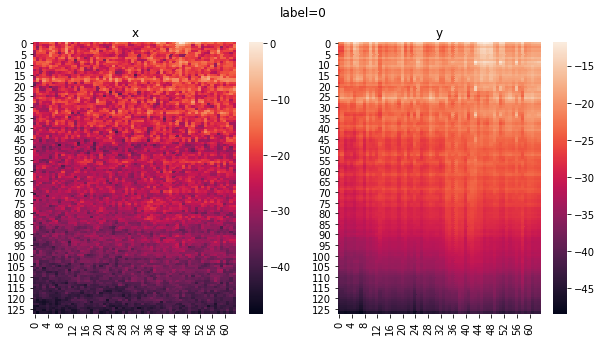

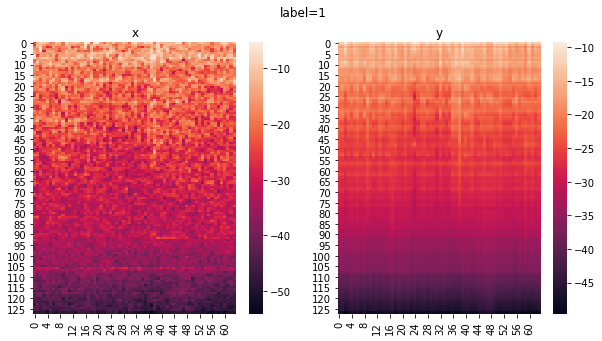

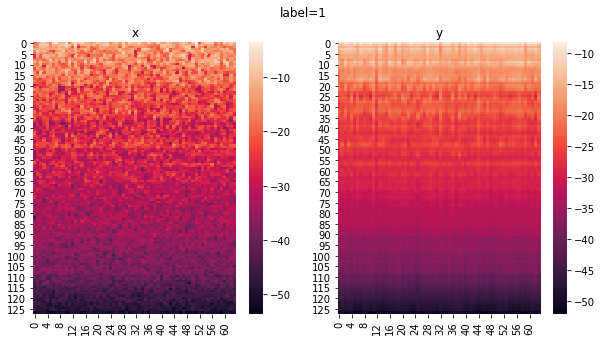

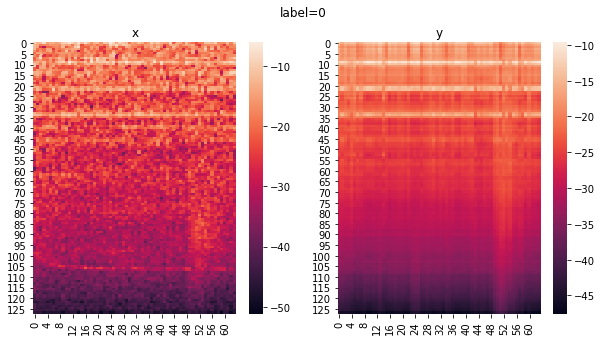

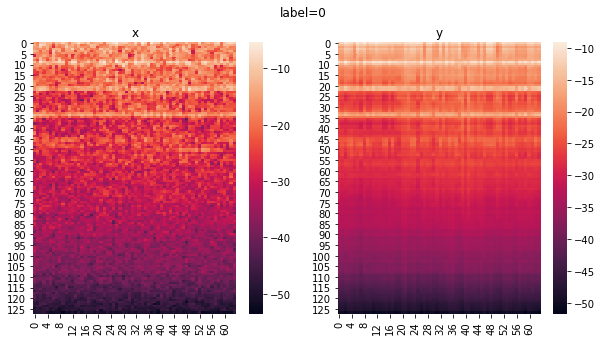

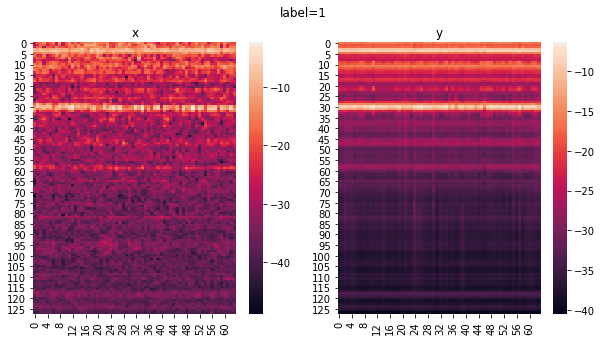

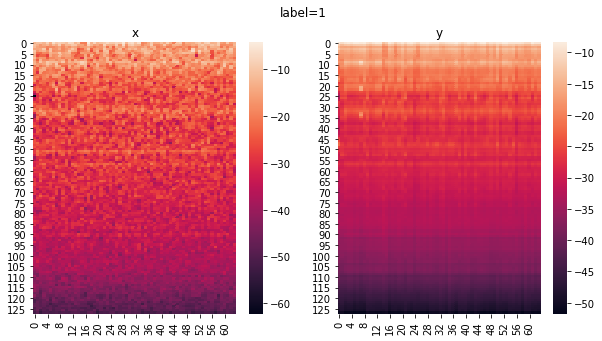

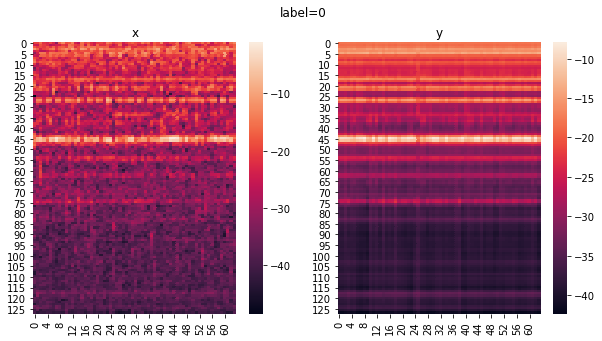

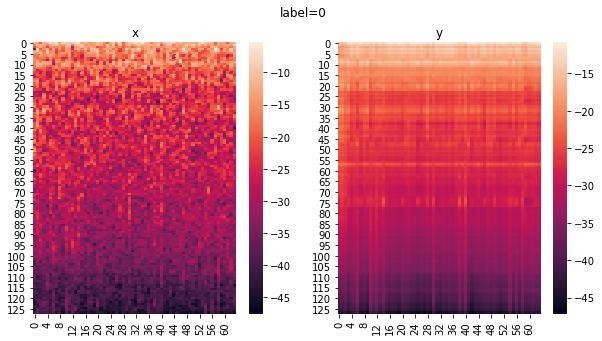

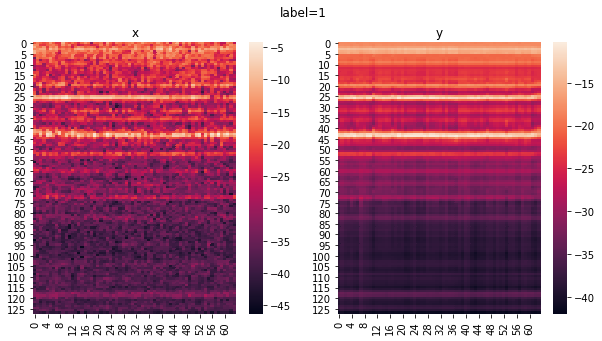

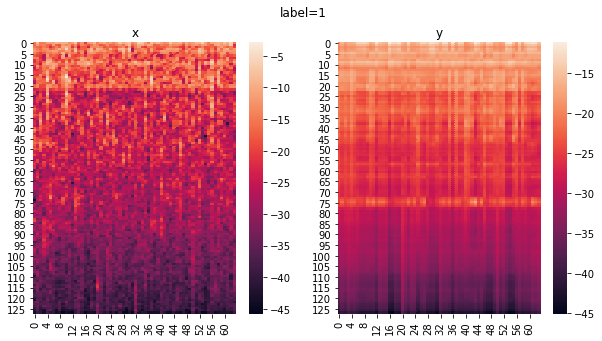

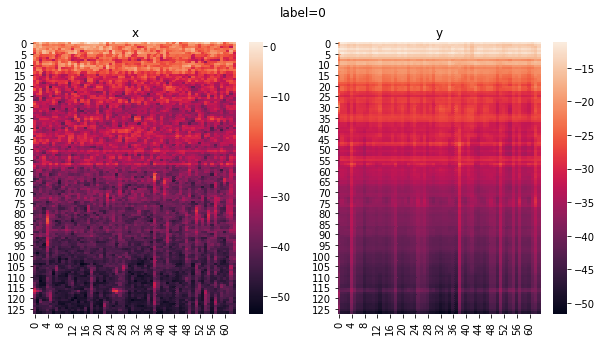

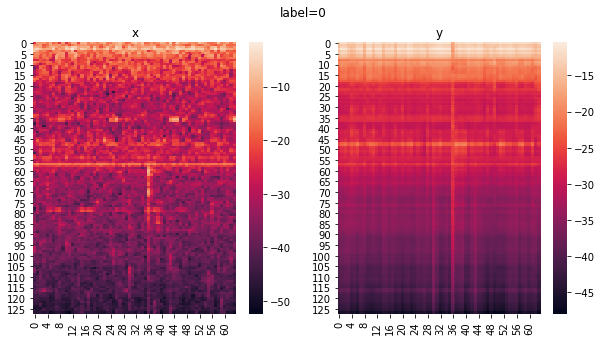

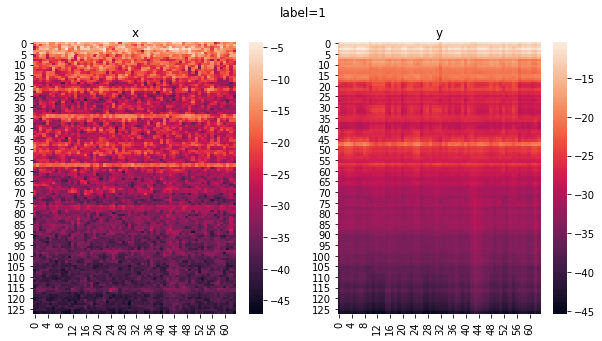

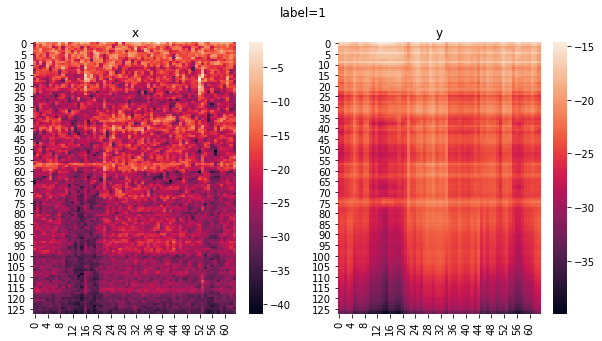

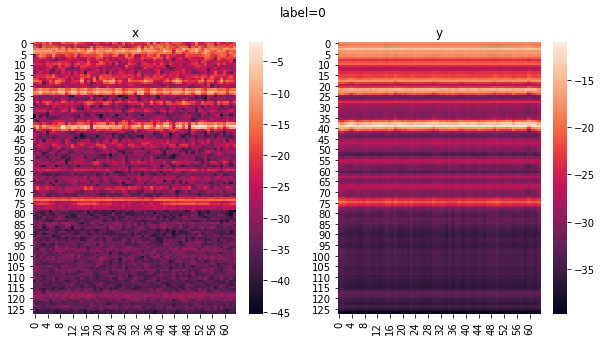

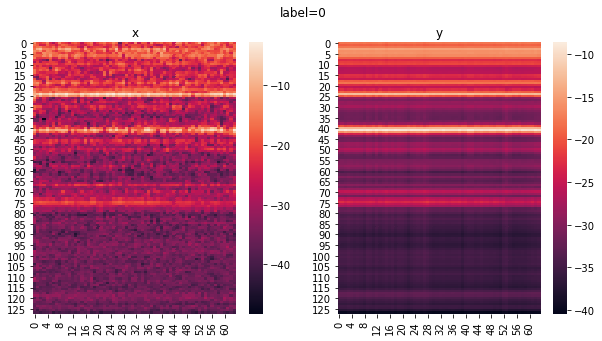

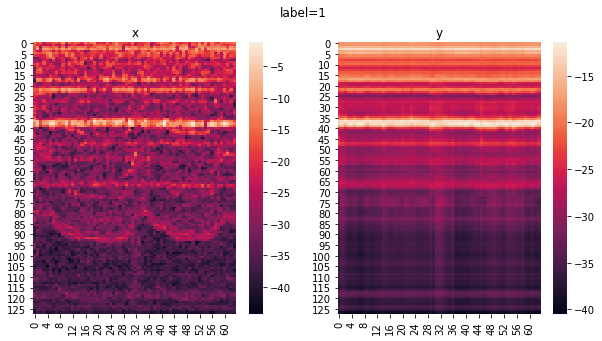

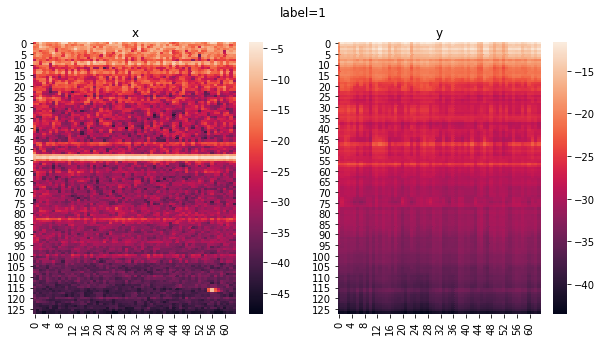

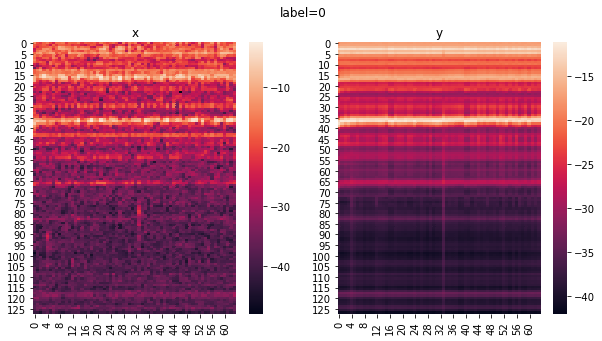

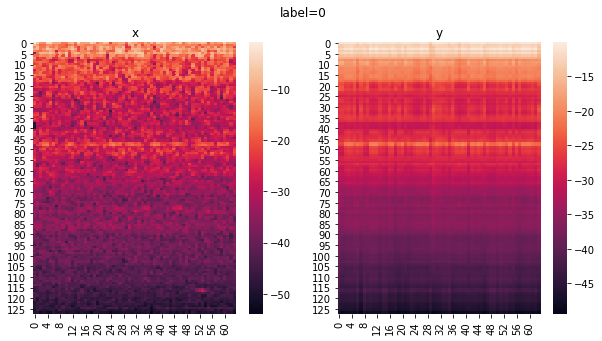

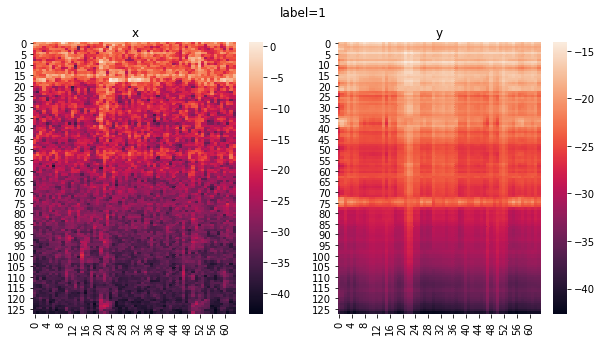

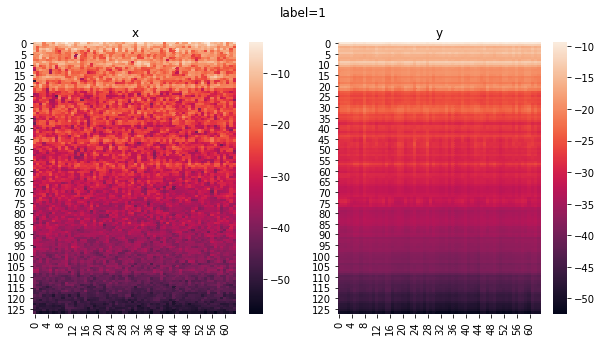

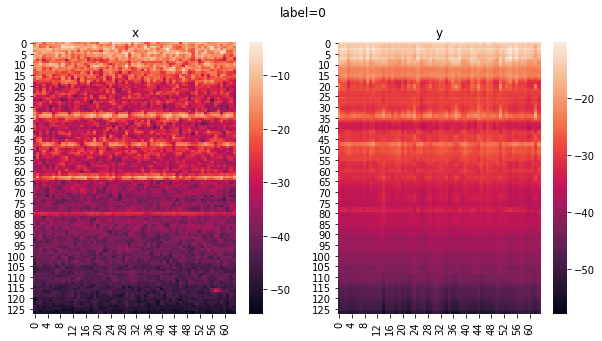

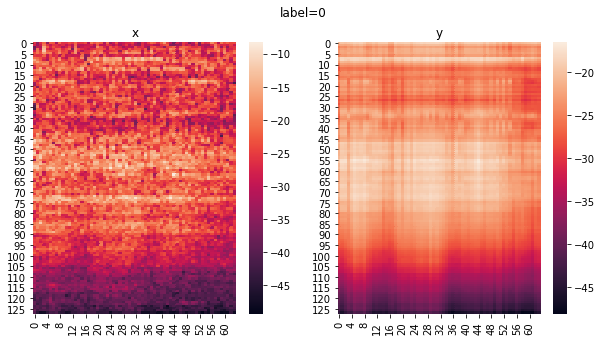

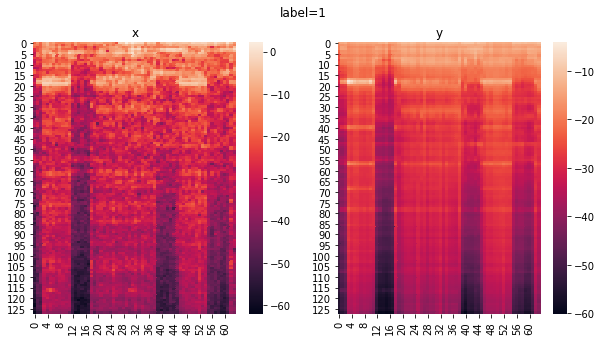

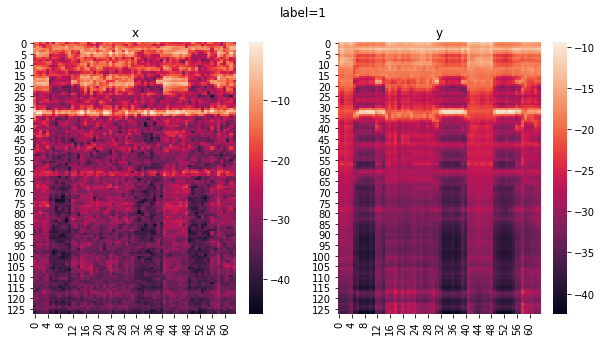

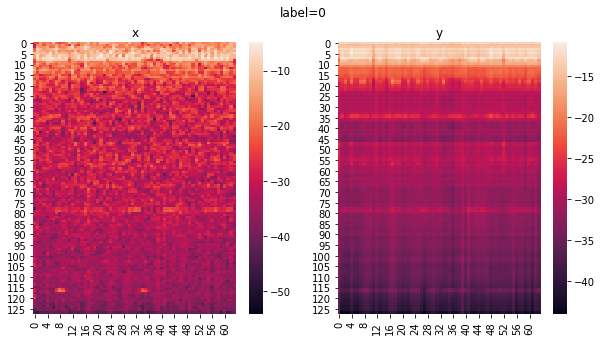

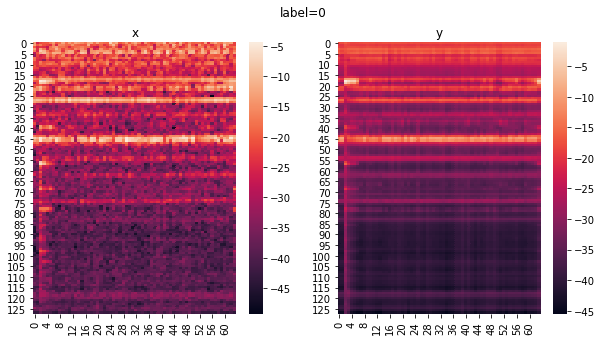

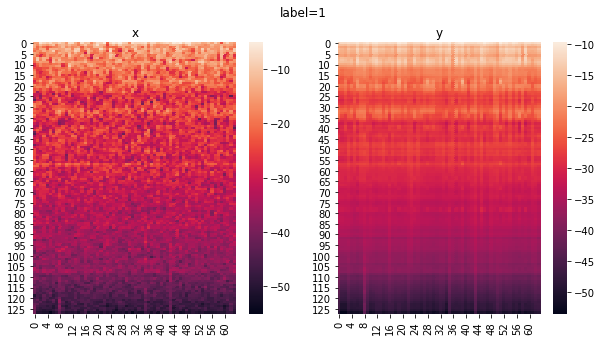

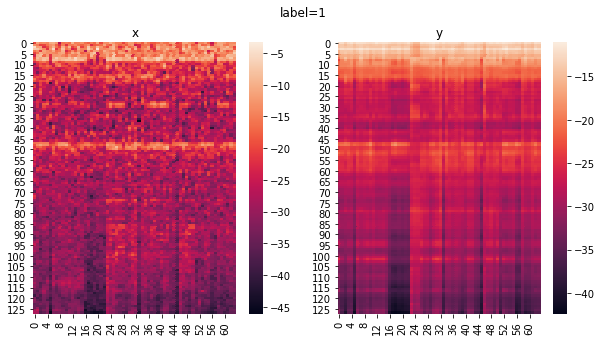

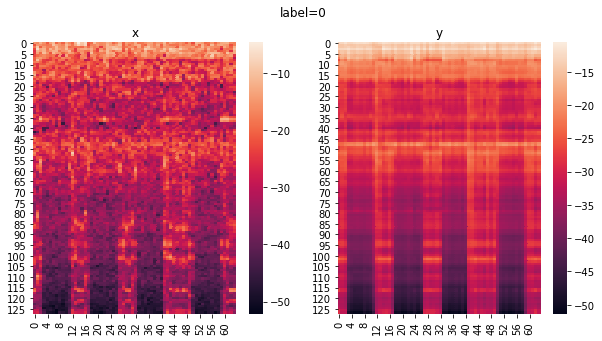

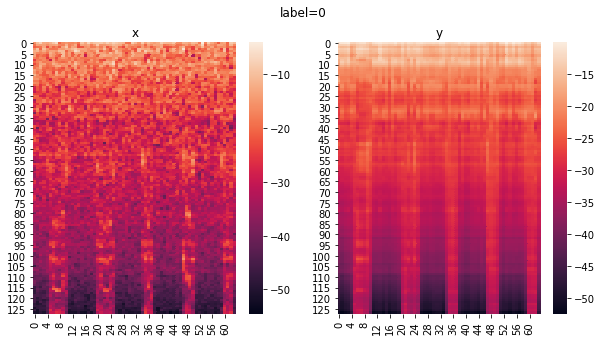

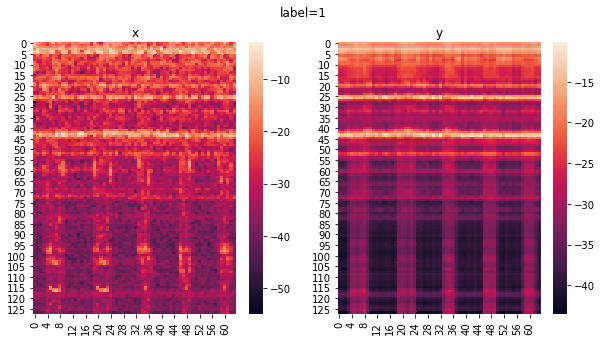

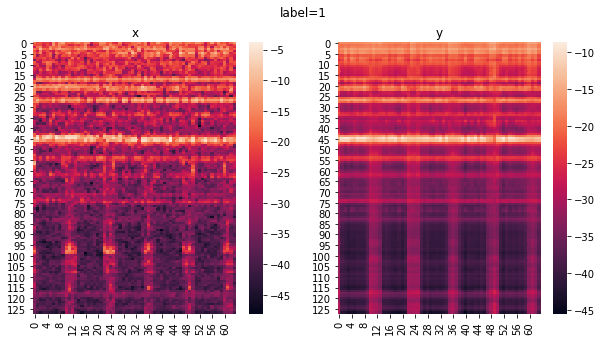

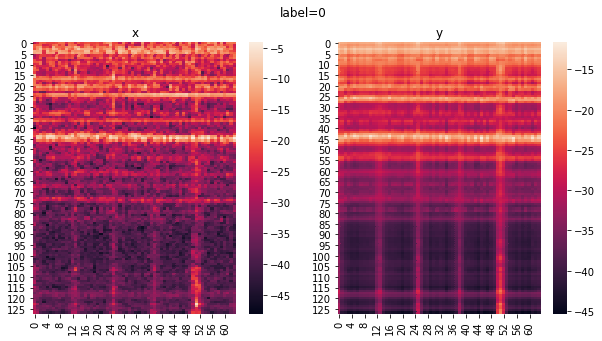

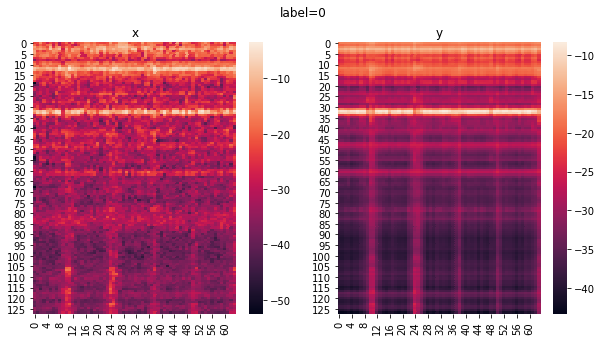

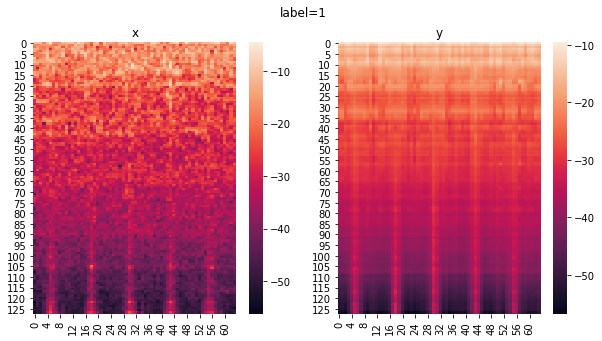

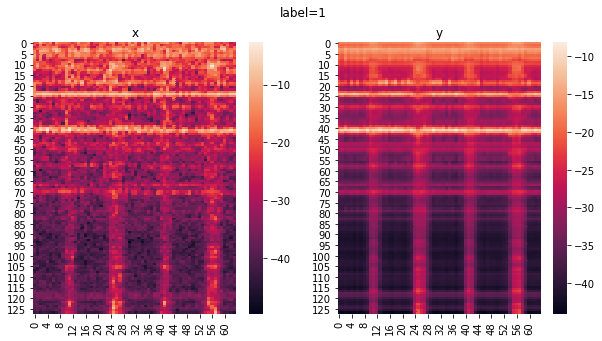

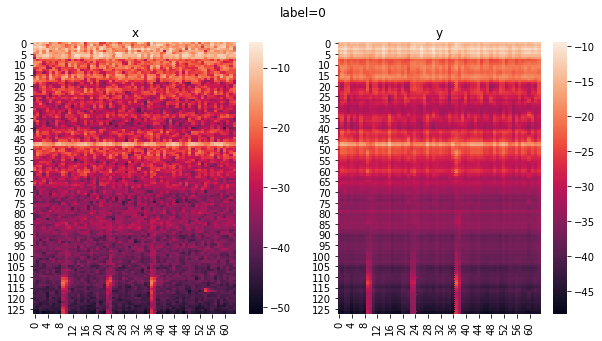

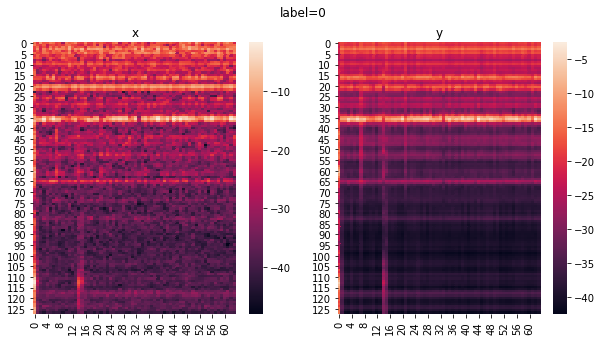

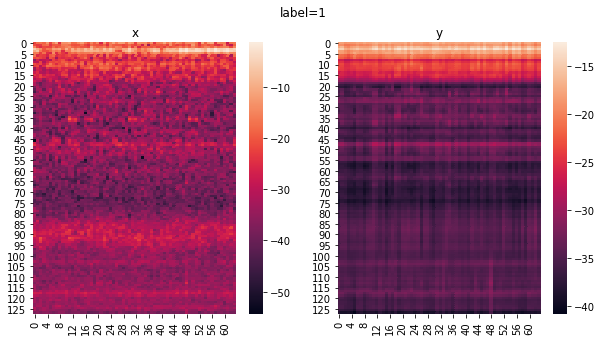

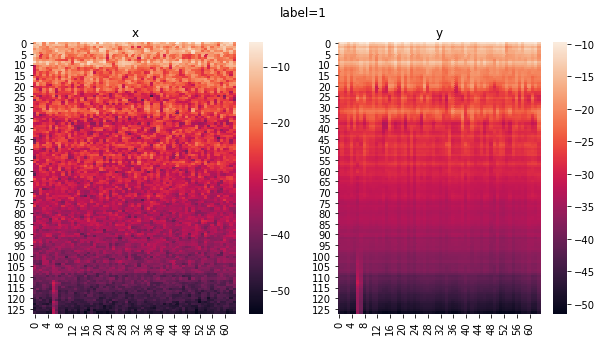

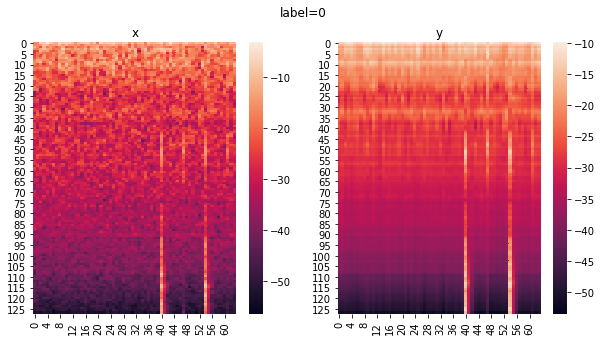

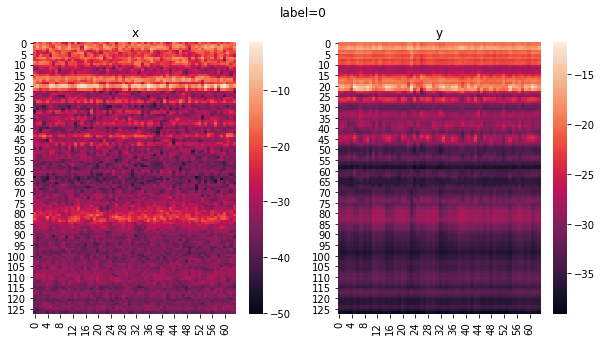

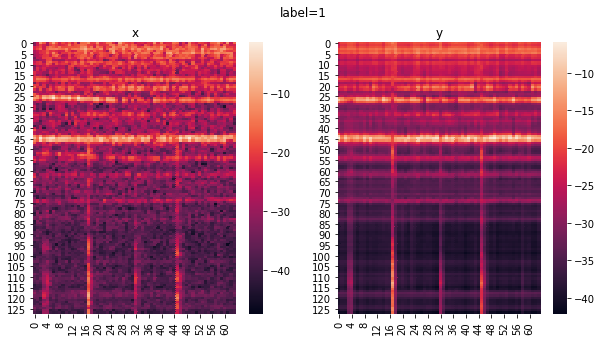

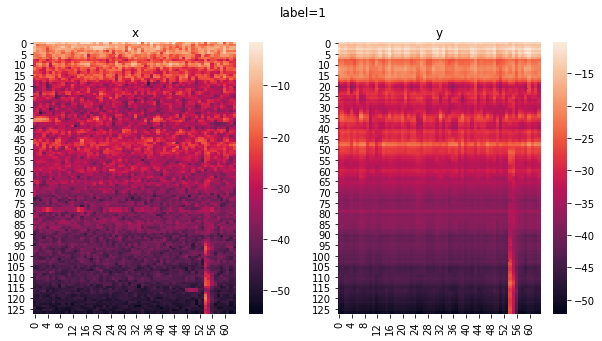

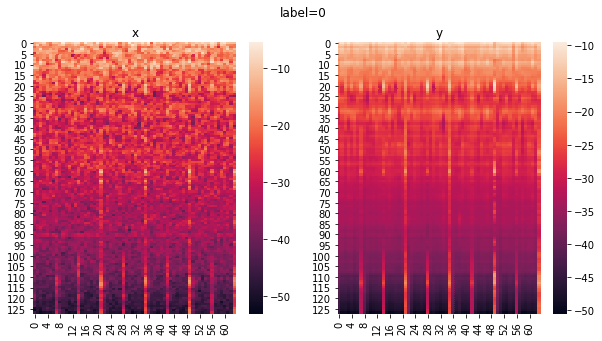

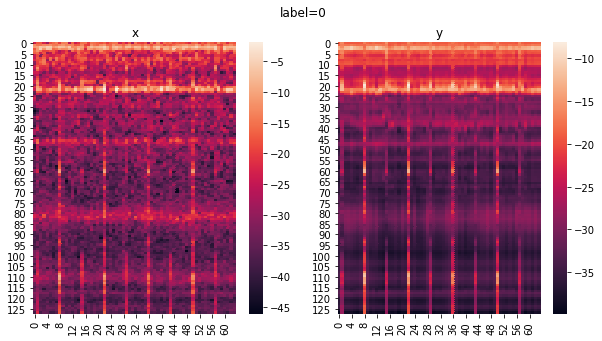

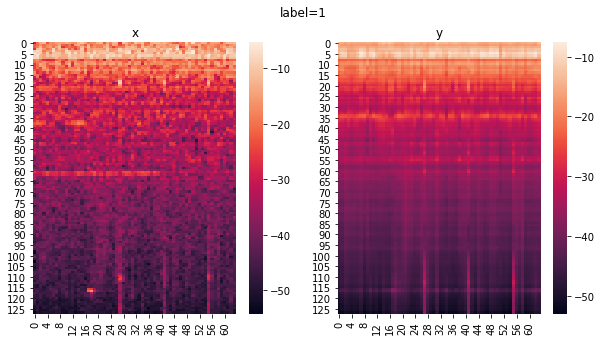

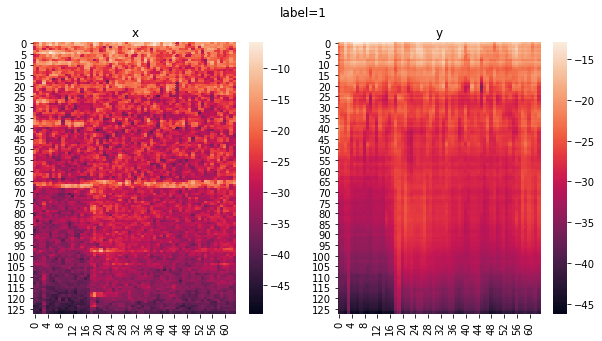

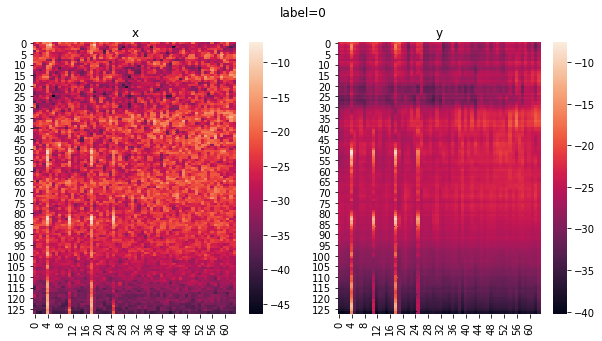

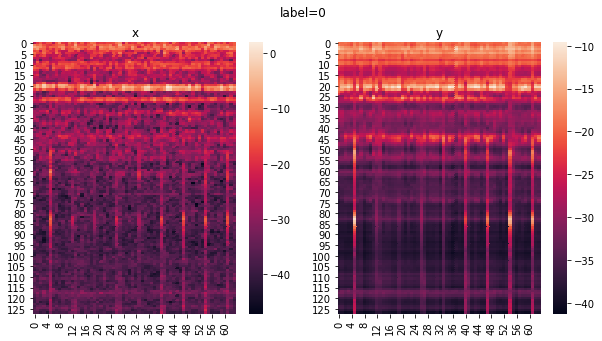

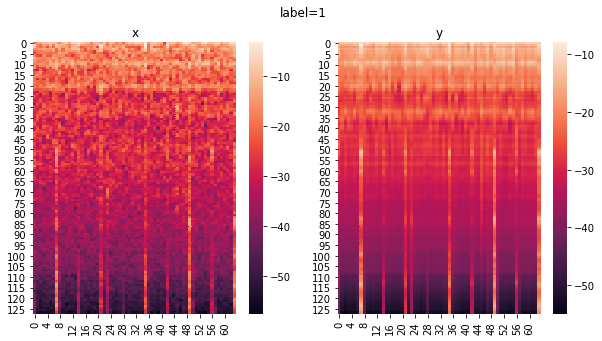

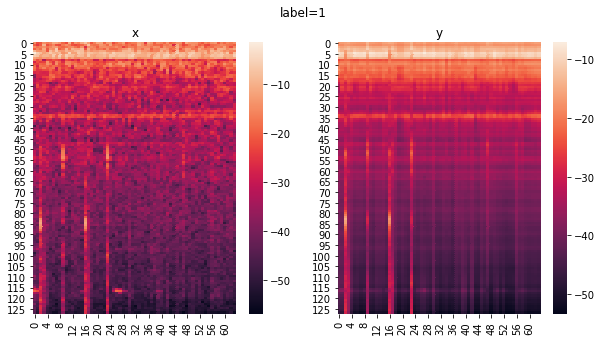

In [18]:
#def run_eval(param, mode):
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# make output result directory
os.makedirs(RESULT_DIR, exist_ok=True)

# load base directory
dirs = com.select_dirs(param=param, mode=mode)

# initialize lines in csv for AUC and pAUC
csv_lines = []


# loop of the base directory
for idx, target_dir in enumerate(dirs):
    com.logger.info("===========================")
    com.logger.info("[{idx}/{total}] {dirname}".format(
        dirname=target_dir, idx=idx+1, total=len(dirs)))

    machine_type = os.path.split(target_dir)[1]

    com.logger.info("============== MODEL LOAD ==============")

    model_file = "{model}/{machine_type}_model.pth".format(
        model=param["model_directory"],
        machine_type=machine_type)

    if not os.path.exists(model_file):
        com.logger.error("{} model not found ".format(machine_type))
        sys.exit(-1)

    # define AE model
    model = Model(sample_rate=config['preprocessing']['sample_rate'],
                  window_size=config['preprocessing']['window_size'],
                  hop_size=config['preprocessing']['hop_size'],
                  mel_bins=config['preprocessing']['mel_bins'],
                  fmin=config['preprocessing']['fmin'],
                  fmax=config['preprocessing']['fmax'],
                  aug_window_size=config['fit']['aug_window_size'],
                  aug_hop_size=config['fit']['aug_hop_size']).to(device)
    model.eval()
    model.load_state_dict(torch.load(model_file))

    if mode:
        # results by type
        csv_lines.append([machine_type])
        csv_lines.append(["id", "AUC", "pAUC"])
        performance = []

    machine_id_list = eval_func.get_machine_id_list_for_test(target_dir)
    recons_outpath = RECONS_OUTDIR + '/' + machine_type
    os.makedirs(recons_outpath, exist_ok=True)
    for id_str in machine_id_list:

        # load list of test files
        test_files, y_true = eval_func.test_file_list_generator(target_dir, id_str, mode)

        # setup anomaly score file path
        anomaly_score_csv = \
            "{result}/anomaly_score_{machine_type}_{id_str}.csv"\
            .format(result=param["result_directory"],
                    machine_type=machine_type,
                    id_str=id_str)
        anomaly_score_list = []

        com.logger.info(
            "============== BEGIN TEST FOR A MACHINE ID ==============")

        y_pred = [0. for k in test_files]
        anomaly_count = 0
        normal_count = 0
        for file_idx, file_path in enumerate(test_files):
            try:
                data = com.file_load(file_path)
                data = data[0]
                # reconstruction through auto encoder in pytorch
                input_data = torch.from_numpy(data).float().to(device)
                input_data = input_data.unsqueeze(0)
                with torch.no_grad():
                    output_dict = model(input_data)
                    pred = output_dict['loss'].to('cpu').detach().numpy().copy()
                    # make reconstruct_img
                    x = output_dict['x'].to('cpu')[0,:,:]
                    y = output_dict['y'].to('cpu')[0,:,:]
                    label = y_true[file_idx]
                    file_name = os.path.basename(file_path).replace('.wav', '')
                    file_name = recons_outpath + '/' + file_name
                    if int(label) == 1:
                        if anomaly_count == 1 or anomaly_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        anomaly_count+=1
                    else:
                        if normal_count == 1 or normal_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        normal_count+=1
                    
                y_pred[file_idx] = pred
                anomaly_score_list.append(
                    [os.path.basename(file_path), y_pred[file_idx]])
            except FileNotFoundError:
                com.logger.error("file broken!!: {}".format(file_path))

        # save anomaly score
        eval_func.save_csv(save_file_path=anomaly_score_csv,
                           save_data=anomaly_score_list)
        com.logger.info(
            "anomaly score result ->  {}".format(anomaly_score_csv))

        if mode:
            # append AUC and pAUC to lists
            auc = metrics.roc_auc_score(y_true, y_pred)
            p_auc = metrics.roc_auc_score(
                y_true, y_pred, max_fpr=config["etc"]["max_fpr"])
            csv_lines.append([id_str.split("_", 1)[1], auc, p_auc])
            performance.append([auc, p_auc])
            com.logger.info("AUC : {}".format(auc))
            com.logger.info("pAUC : {}".format(p_auc))

        com.logger.info(
            "============ END OF TEST FOR A MACHINE ID ============")

    if mode:
        # calculate averages for AUCs and pAUCs
        averaged_performance = numpy.mean(
            numpy.array(performance, dtype=float), axis=0)
        csv_lines.append(["Average"] + list(averaged_performance))
        csv_lines.append([])

if mode:
    # output results
    result_path = "{result}/{file_name}".format(
        result=param["result_directory"],
        file_name=param["result_file"])
    com.logger.info("AUC and pAUC results -> {}".format(result_path))
    eval_func.save_csv(save_file_path=result_path, save_data=csv_lines)